In [1]:
import numpy as np
from dimer_gutzwiller_mc import DimerGutzwillerMCParameters
from pickle import load
import matplotlib.pyplot as plt

In [2]:
nwalk = 10**7
T = 20
dt = .01
lambdas = [[.5, .5], [.5, 1.5], [1.5, .5]]
omega_S = 1
walk_pos0 = np.array(nwalk * [[np.pi, np.pi]])


sim_list = [DimerGutzwillerMCParameters(omega_S,
                                        lmbd_1,
                                        lmbd_2,
                                        walk_pos0,
                                        dt,
                                        T,
                                        nwalk)
            for lmbd_1, lmbd_2 in lambdas]

In [3]:
walk_positions = []

for sim in sim_list:
    f = open(f"data/{str(sim)}.pkl", "rb")
    data = load(f)
    f.close()
    walk_positions.append(data[1])

walk_positions = np.array(walk_positions)

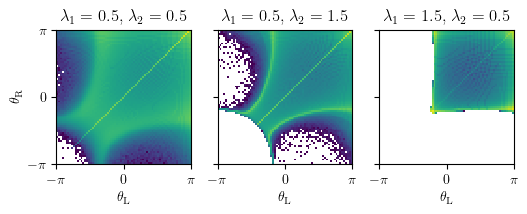

In [4]:
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_grid_1x3.mplstyle"])

bins = 72
binning_range = [[-np.pi, np.pi], [-np.pi, np.pi]]
ticks = np.linspace(-np.pi, np.pi, 3)
tick_labels = [r"$-\pi$", r"$0$", r"$\pi$"]

fig, axs = plt.subplots(1, 3)
for i, sim in enumerate(sim_list):

    
    axs[i].hist2d(walk_positions[i][:, 0], walk_positions[i][:, 1],
                  density=True,
                  range=binning_range,
                  bins=bins,
                  norm="log")
    axs[i].set_xticks(ticks)
    axs[i].set_xticklabels(tick_labels)
    axs[i].set_yticks(ticks)
    axs[i].set_yticklabels(tick_labels)
    axs[i].set_title(rf"$\lambda_1 = {sim.lmbd_1}$, $\lambda_2 = {sim.lmbd_2}$")
    axs[i].set(xlabel=r"$\theta_\mathrm{L}$", ylabel=r"$\theta_\mathrm{R}$")
    axs[i].set(aspect='equal')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig("plots/dimer-gutz-p-infty-mc.pdf")

# T convergence

In [5]:
sim_list_10 = [DimerGutzwillerMCParameters(omega_S,
                                           lmbd_1,
                                           lmbd_2,
                                           walk_pos0,
                                           dt,
                                           10,
                                           nwalk)
               for lmbd_1, lmbd_2 in lambdas]

In [6]:
walk_positions_10 = []

for sim in sim_list_10:
    f = open(f"data/{str(sim)}.pkl", "rb")
    data = load(f)
    f.close()
    walk_positions_10.append(data[1])

walk_positions_10 = np.array(walk_positions_10)

/tmp/ipykernel_124926/1410750377.py:27: RuntimeWarning: invalid value encountered in divide
  diff = np.sqrt(2) * np.abs(hist - hist_10) / np.sqrt(hist + hist_10)
/tmp/ipykernel_124926/1410750377.py:27: RuntimeWarning: invalid value encountered in divide
  diff = np.sqrt(2) * np.abs(hist - hist_10) / np.sqrt(hist + hist_10)
/tmp/ipykernel_124926/1410750377.py:27: RuntimeWarning: invalid value encountered in divide
  diff = np.sqrt(2) * np.abs(hist - hist_10) / np.sqrt(hist + hist_10)


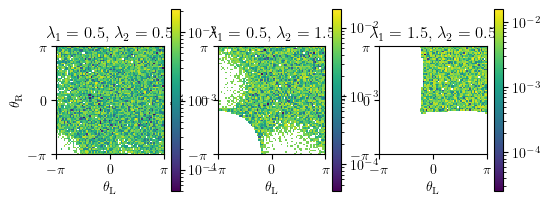

In [7]:
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_grid_1x3.mplstyle"])

bins = 72
binning_range = [[-np.pi, np.pi], [-np.pi, np.pi]]
ticks = np.linspace(-np.pi, np.pi, 3)
tick_labels = [r"$-\pi$", r"$0$", r"$\pi$"]

fig, axs = plt.subplots(1, 3)
for i, sim in enumerate(sim_list):
    # x = (2 * (np.abs(walk_positions[i][:, 0] - walk_positions_10[i][:, 0]))
    #      / (walk_positions[i][:, 0] + walk_positions_10[i][:, 0]))
    # y = (2 * (np.abs(walk_positions[i][:, 1] - walk_positions_10[i][:, 1]))
    #      / (walk_positions[i][:, 1] + walk_positions_10[i][:, 1]))
    
    hist, xedges,yedges = np.histogram2d(walk_positions[i][:, 0],
                                 walk_positions[i][:, 1],
                                 bins=bins,
                                 range=binning_range,
                                 density=True)

    hist_10, xedges,yedges = np.histogram2d(walk_positions_10[i][:, 0],
                                 walk_positions_10[i][:, 1],
                                 bins=bins,
                                 range=binning_range,
                                 density=True)

    diff = np.sqrt(2) * np.abs(hist - hist_10) / np.sqrt(hist + hist_10)
    X, Y = np.meshgrid(xedges, yedges)

    pms = axs[i].pcolormesh(X, Y, diff,
                            norm="log")
    # h = axs[i].hist2d(x, y,
    #               density=True,
    #               range=binning_range,
    #               bins=bins,
    #               norm="log")
    axs[i].set_xticks(ticks)
    axs[i].set_xticklabels(tick_labels)
    axs[i].set_yticks(ticks)
    axs[i].set_yticklabels(tick_labels)
    axs[i].set_title(rf"$\lambda_1 = {sim.lmbd_1}$, $\lambda_2 = {sim.lmbd_2}$")
    axs[i].set(xlabel=r"$\theta_\mathrm{L}$", ylabel=r"$\theta_\mathrm{R}$")
    axs[i].set(aspect='equal')

    fig.colorbar(pms, ax=axs[i])

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# plt.savefig("/tmp/diff.pdf")